In [28]:
import numpy as np
import matplotlib.pyplot as plt
from data import Data
from GD import (loss,
                g,
                init_w,
                predict)
import time

In [29]:
data_loader = Data("Rice_Cammeo_Osmancik.arff")
X = data_loader.get_X()
y = data_loader.get_y()
X_normalized = data_loader.normalize_data(X)
X_with_bias = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

In [30]:
X_train, X_test, y_train, y_test = data_loader.split_data(X_with_bias, y, test_size=0.2)

#### GD

In [31]:
n_features = X_train.shape[1]
w = init_w(n_features)

In [32]:
learning_rate = 0.01
epochs =  100000
min_loss_improvement = 0.001

current_loss = loss(X_train, y_train, w)

predictions = predict(X_test, w)
accuracy = np.mean(predictions == y_test)

loss_values_gd = [current_loss]
times_gd = [0]

start_time_gd = time.time()

for epoch in range(1, epochs+1):
    gradient = g(X_train, y_train, w)
    w -= learning_rate * gradient

    current_time = (time.time() - start_time_gd) * 1000

    current_loss = loss(X_train, y_train, w)
    loss_values_gd.append(current_loss)
    
    predictions = predict(X_test, w)
    
    times_gd.append(current_time)
    
    if epoch > 200:
        avg_previous_loss = np.mean(loss_values_gd[-201:-1])
        if (current_loss - avg_previous_loss > -min_loss_improvement):
            break


#### SGD

In [33]:
n_features = X_train.shape[1]
w = init_w(n_features)

In [34]:
learning_rate = 0.01
epochs =  100000
min_loss_improvement = 0.001

current_loss = loss(X_train, y_train, w)

predictions = predict(X_test, w)

loss_values_sgd = [current_loss]
times_sgd = [0]

start_time_sgd = time.time()


for epoch in range(1, epochs+1):
    random_sample_index = np.random.choice(X_train.shape[0], 1)
    random_x = X_train[random_sample_index]
    random_y = y_train[random_sample_index]
    
    gradient = g(random_x, random_y, w)
    w -= learning_rate * gradient

    current_time = (time.time() - start_time_sgd) * 1000

    current_loss = loss(X_train, y_train, w)
    loss_values_sgd.append(current_loss)
    
    predictions = predict(X_test, w)
    accuracy = np.mean(predictions == y_test)
    
    times_sgd.append(current_time)
    
    if epoch > 200:
        avg_previous_loss = np.mean(loss_values_sgd[-201:-1])
        if (current_loss - avg_previous_loss > -min_loss_improvement):
            break


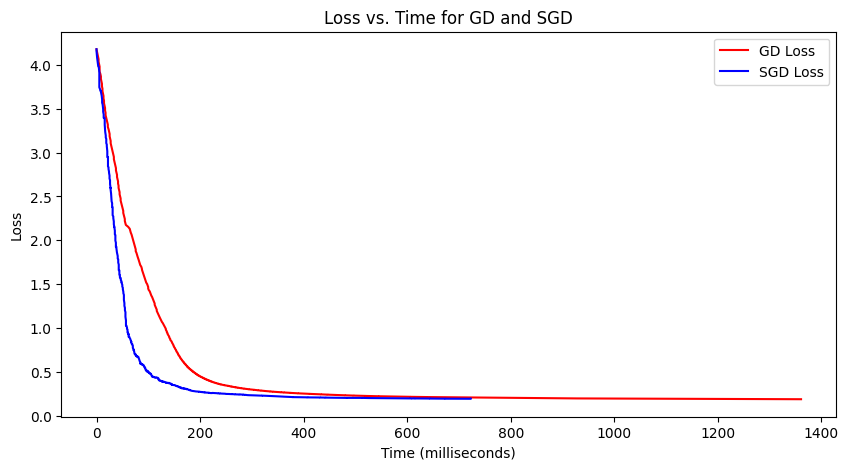

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(times_gd, loss_values_gd, label='GD Loss', color='red')
plt.plot(times_sgd, loss_values_sgd, label='SGD Loss', color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Loss')
plt.title('Loss vs. Time for GD and SGD')
plt.legend()
plt.show()

In [36]:
print(loss_values_gd[-1])
print(loss_values_sgd[-1])

0.19069233668367386
0.19605188395365125
